## What are the trends in Malaria Cases in Southern Province Zambia between 2014 and 2018?

**Summary** <br>
Southern Province in Zambia is one of the regions with the highest cases of malaria reported in Zambia, with over 10000 cases reported in 
some districts between 2014 and 2018.
The purpose of this exercise is to explore the data and establish any trends in data that can be identified.

The following questions are posed in order to assist in the data exploration process:
-  What are the total number of cases recorded per district?
-  What are the total number of cases recorded per year per district?
-  Have the cases recorded increased or decreased over the period of time in question?
-  Is there any correlation between the cases recorded and the rainy season in Zambia (November to April)?
-  Which districts recorded the highest Malaria cases?
-  Which districts recorded the highest increase  or decrease in malaria cases?

In [46]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gmaps
import gmaps.datasets
from IPython.display import Image

In [2]:
data = pd.read_excel('../NoMalariaCounts.xlsx', col_index= None)
df = data.drop(['Disclaimer'], axis=1)
df.head()

,Country,Province,District,Rural/Urban,Date,Reporting Category,Cases
0,Zambia,Southern,Chikankata,Rural,2014-01-01,Health Facility,0
1,Zambia,Southern,Chikankata,Rural,2014-01-01,Community Health Worker,288
2,Zambia,Southern,Chikankata,Rural,2014-02-01,Health Facility,0
3,Zambia,Southern,Chikankata,Rural,2014-02-01,Community Health Worker,251
4,Zambia,Southern,Chikankata,Rural,2014-03-01,Health Facility,0


In [83]:
total_cases_per_district = df.groupby('District').sum()
print("Total Sum Per District")
total_cases_per_district

Total Sum Per District


,Cases
District,
Chikankata,13917
Choma,32397
Gwembe,64059
Kalomo,35529
Kazungula,33731
Livingstone,4790
Mazabuka,8068
Monze,9243
Namwala,6439


In [81]:
df.groupby('District').mean()

,Cases
District,
Chikankata,69.585000
Choma,80.992500
Gwembe,320.295000
Kalomo,88.822500
Kazungula,84.327500
Livingstone,25.752688
Mazabuka,20.170000
Monze,23.107500
Namwala,32.195000


In [82]:
df.groupby('District').std()

,Cases
District,
Chikankata,130.622179
Choma,330.022749
Gwembe,632.126862
Kalomo,257.020670
Kazungula,284.332557
Livingstone,60.899857
Mazabuka,40.638835
Monze,54.459945
Namwala,84.641704


In [9]:
#investiage reporting category findings
#df[df['Reporting Category'] == 'Health Facility']

In [33]:
total_cases_per_district_per_year = df.groupby(['District', df['Date'].dt.year]).sum()
unstacked_cases_per_year = total_cases_per_district_per_year.unstack('District')
unstacked_cases_per_year

Cases                                                            \
District Chikankata  Choma Gwembe Kalomo Kazungula Livingstone Mazabuka Monze   
Date                                                                            
2014           5852  21810  29523  14410      8093        1752     2919  4152   
2015           2717   4030  15349   4005      3623         837     1297  1539   
2016           2178   3940   4963   9690     13009        1255     2328  1939   
2017           2073   2396   9899   6983      8627         845     1322  1452   
2018           1097    221   4325    441       379         101      202   161   

                                                   
District Namwala  Pemba Siavonga Sinazongwe Zimba  
Date                                               
2014        1073  24984    15995      70664  8326  
2015         695   6925     6295      43057  3930  
2016        2801   2019     7087      16823  1306  
2017        1813    994    10595      18761  1094  
2018          57    159      731       9569   328

In [72]:
month_df = df.rename(columns={'Date': 'Month'})
piv_zme_monthly = pd.pivot_table(month_df, values = 'Cases', index=['District'], columns = month_df['Month'].dt.month, aggfunc = np.sum)
piv_zme_monthly['Total Number of Cases per District'] = piv_zme_monthly.sum(axis=1)
piv_zme_monthly


Month,1,2,3,4,5,6,7,8,9,10,11,12,Total Number of Cases per District
District,,,,,,,,,,,,,
Chikankata,2556,1903,2051,2267,1738,599,378,260,391,515,398,861,13917
Choma,2766,3516,7604,6994,5294,2209,769,422,489,731,661,942,32397
Gwembe,6381,4958,7330,8352,8341,5534,7538,4998,4205,2716,1731,1975,64059
Kalomo,2633,3480,5937,9419,6923,2835,1193,605,439,472,540,1053,35529
Kazungula,2618,4200,6528,8215,7708,2215,645,260,156,208,173,805,33731
Livingstone,509,466,614,799,1081,393,140,137,124,95,167,265,4790
Mazabuka,1074,784,1070,1546,1571,587,255,223,210,163,218,367,8068
Monze,1274,888,1215,1676,1825,817,353,266,234,236,141,318,9243
Namwala,765,585,1091,1194,1668,472,161,73,57,49,69,255,6439


In [71]:
month_df = df.rename(columns={'Date': 'Month'})
piv_monthly = pd.pivot_table(month_df, values = 'Cases', index=[month_df['Month'].dt.month], columns = ['District'], aggfunc = np.sum)
piv_monthly['Total number of Cases per Month'] = piv_monthly.sum(axis=1)
piv_monthly

District,Chikankata,Choma,Gwembe,Kalomo,Kazungula,Livingstone,Mazabuka,Monze,Namwala,Pemba,Siavonga,Sinazongwe,Zimba,Total number of Cases per Month
Month,,,,,,,,,,,,,,
1,2556,2766,6381,2633,2618,509,1074,1274,765,5064,2074,16561,1640,45915
2,1903,3516,4958,3480,4200,466,784,888,585,5972,1998,11983,2202,42935
3,2051,7604,7330,5937,6528,614,1070,1215,1091,6593,4837,18379,3508,66757
4,2267,6994,8352,9419,8215,799,1546,1676,1194,5423,5955,20070,3447,75357
5,1738,5294,8341,6923,7708,1081,1571,1825,1668,5247,7246,21220,1739,71601
6,599,2209,5534,2835,2215,393,587,817,472,2686,4542,17599,652,41140
7,378,769,7538,1193,645,140,255,353,161,1083,3694,9924,243,26376
8,260,422,4998,605,260,137,223,266,73,553,3995,8765,179,20736
9,391,489,4205,439,156,124,210,234,57,458,3045,12220,158,22186


In [74]:
piv_monthly.drop('Total number of Cases per Month', axis = 1, inplace = True)
piv_monthly.rank(ascending = False, method = 'first')

District,Chikankata,Choma,Gwembe,Kalomo,Kazungula,Livingstone,Mazabuka,Monze,Namwala,Pemba,Siavonga,Sinazongwe,Zimba
Month,,,,,,,,,,,,,
1,1.0,5.0,5.0,6.0,5.0,4.0,3.0,3.0,4.0,5.0,8.0,5.0,5.0
2,4.0,4.0,8.0,4.0,4.0,5.0,5.0,5.0,5.0,2.0,9.0,7.0,3.0
3,3.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,1.0,3.0,3.0,1.0
4,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
5,5.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,4.0
6,7.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,6.0
7,11.0,8.0,3.0,7.0,8.0,9.0,8.0,7.0,8.0,7.0,6.0,9.0,10.0
8,12.0,12.0,7.0,9.0,9.0,10.0,9.0,9.0,9.0,10.0,5.0,10.0,11.0
9,10.0,11.0,9.0,12.0,12.0,11.0,11.0,11.0,11.0,12.0,7.0,6.0,12.0


In [62]:
year_df = df.rename(columns={'Date': 'Year'})
piv_zme_year = pd.pivot_table(year_df, values = 'Cases', index=['District'], columns = year_df['Year'].dt.year, aggfunc = np.sum)
piv_zme_year.rank(ascending = False, method = 'first')

Year,2014,2015,2016,2017,2018
District,,,,,
Chikankata,9.0,9.0,9.0,7.0,3.0
Choma,4.0,5.0,6.0,6.0,8.0
Gwembe,2.0,2.0,5.0,3.0,2.0
Kalomo,6.0,6.0,3.0,5.0,5.0
Kazungula,8.0,8.0,2.0,4.0,6.0
Livingstone,12.0,12.0,13.0,13.0,12.0
Mazabuka,11.0,11.0,8.0,10.0,9.0
Monze,10.0,10.0,11.0,9.0,10.0
Namwala,13.0,13.0,7.0,8.0,13.0


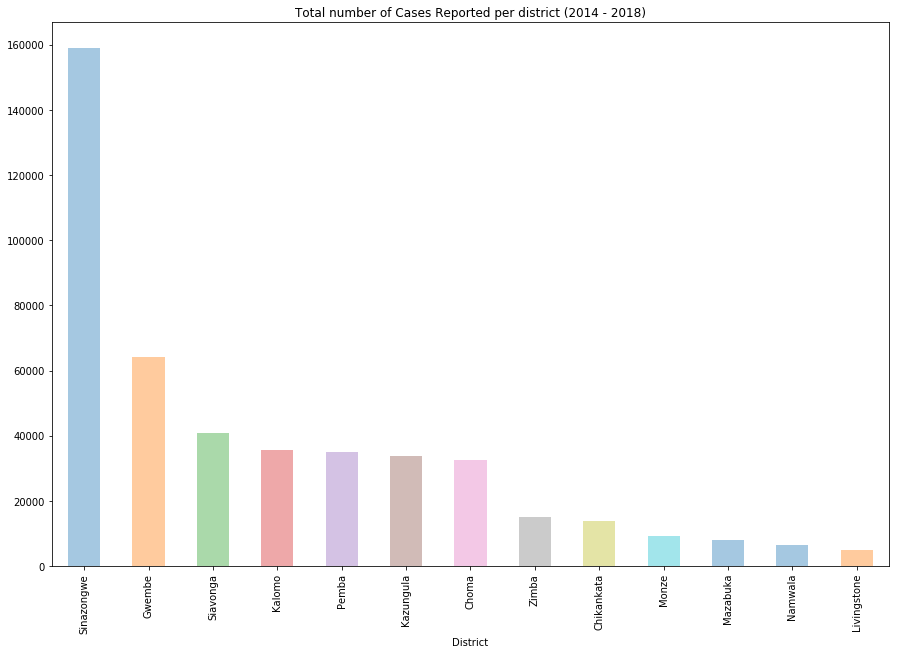

In [76]:
sorted_totals = piv_zme_monthly['Total Number of Cases per District'].sort_values(ascending = False)
sorted_totals.plot(kind = 'bar', style = 'b', alpha = 0.4, figsize=(15,10), title = 'Total number of Cases Reported per district (2014 - 2018)')

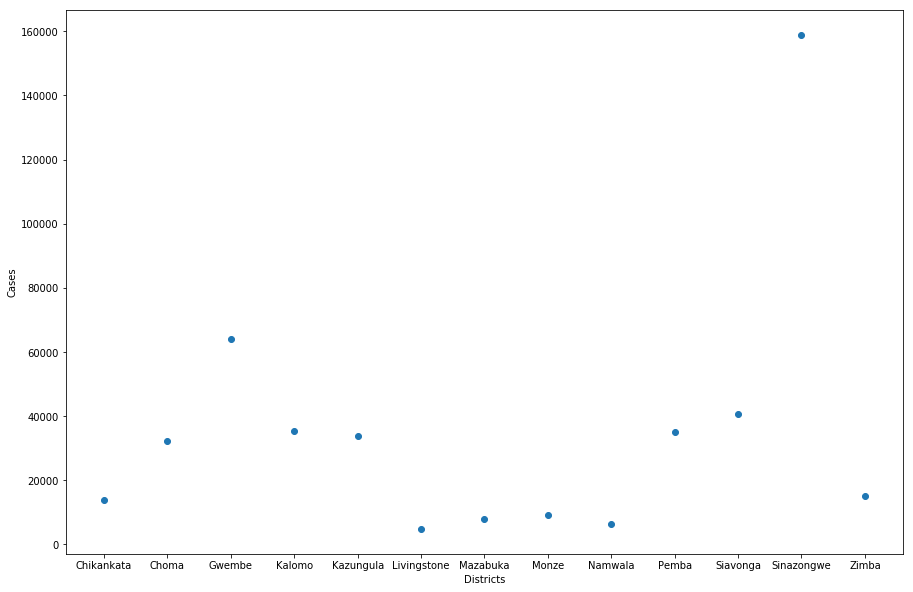

In [60]:
_ = plt.figure(figsize=(15,10))
_ = plt.plot(total_cases_per_district,"o")
_ = plt.xlabel('Districts')
_ = plt.ylabel('Cases')
plt.show()

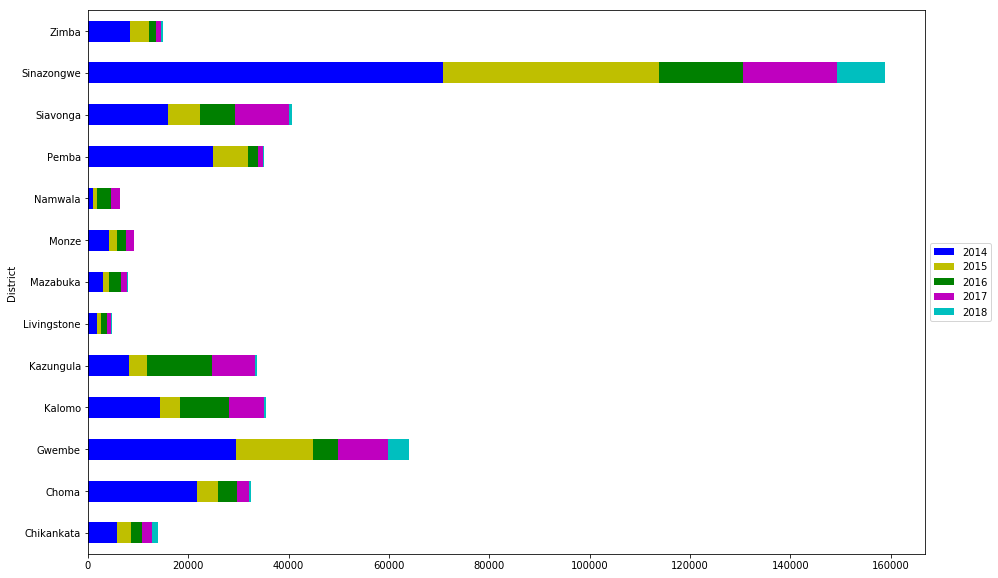

In [61]:
year_colors = ['b','y','g','m','c']
barh_years = piv_zme_year.plot(kind='barh', figsize=(15,10), stacked = True, color = year_colors)
barh_years.legend(loc = 'center left', bbox_to_anchor = (1, .5))

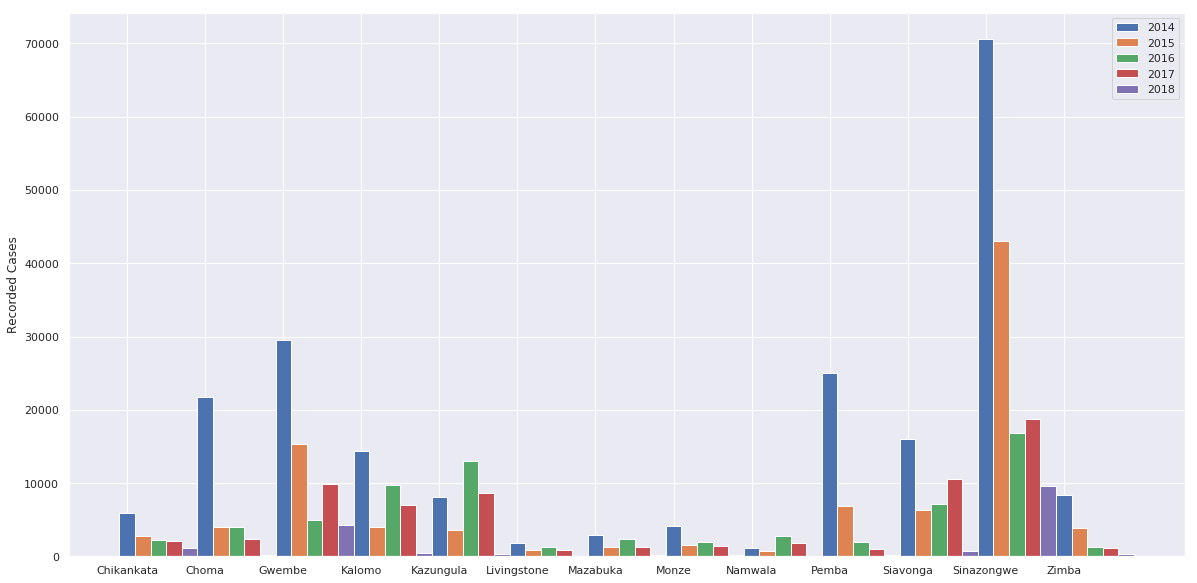

In [176]:
def derieve_dist_values(data):
    array_values = data.values
    name = data.name
    return name, array_values

x = unstacked_cases_per_year['Cases']
bars_hash = {}
for i in range(len(x.index)):
    key, value = derieve_dist_values(x.iloc[i])
    bars_hash[key] = value


bar_width = 0.20

r1 = np.arange(len(x.columns.values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]


fig, ax = plt.subplots(figsize=(20,10))
rect1 = ax.bar(r1, bars_hash[2014], width=bar_width, edgecolor='white',  label='2014')
rect2 = ax.bar(r2, bars_hash[2015], width=bar_width, edgecolor='white', label='2015')
rect3 = ax.bar(r3, bars_hash[2016], width= bar_width, edgecolor='white',label='2016')
rect4 = ax.bar(r4, bars_hash[2017], width= bar_width, edgecolor='white', label='2017')
rect5 = ax.bar(r5, bars_hash[2018], width=bar_width, edgecolor='white', label='2018')

ax.set_ylabel('Recorded Cases')

ax.set_xticks(ind)
ax.set_xticklabels(x.columns.values)
ax.legend()
plt.show()

In [8]:
locations = {
    'Choma' : [-16.816667, 26.975],
    'Chikankata' : [-16.25,28.133333],
    'Gwembe' : [-16.500257,27.590672],
    'Kalomo' : [-17.029905,26.478398],
    'Kazungula' : [-17.780609,25.277832],
    'Livingstone' : [-17.851979,25.828515],
    'Mazabuka' : [-15.861252,27.749066],
    'Monze' : [-16.280321,27.473257],
    'Namwala' : [-15.752472,26.437093],
    'Pemba' : [-16.521119,27.367523],
    'Siavonga' : [-16.532338,28.711054],
    'Sinazongwe' : [-17.222362,27.47913],
    'Zimba' : [-17.308858,26.195021]
}

def get_districts_array(df):
    df_districts = df['District']
    districts = df_districts.drop_duplicates(keep='last').values
    return districts
    
def get_locations(districts, locations_hash):
    lats = []
    longs = []
    for district in districts:
        lats.append(locations_hash[district][0])
        longs.append(locations_hash[district][1])
    return lats,longs

    
districts = get_districts_array(df)
latitudes, longitudes = get_locations(districts, locations)
locations_hash = {
    'District': districts,
    'latitude': latitudes,
    'longitudes': longitudes
}
locations_df = pd.DataFrame(locations_hash)
locations_cases_df = pd.merge(locations_df,total_cases_per_district, on= 'District')


google_maps_api = open('../../../shared_resources/googlr_maps_api.txt','r').read()
gmaps.configure(api_key=google_maps_api)

locations = locations_cases_df[['latitude','longitudes']]
weights = locations_cases_df['Cases']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations,weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

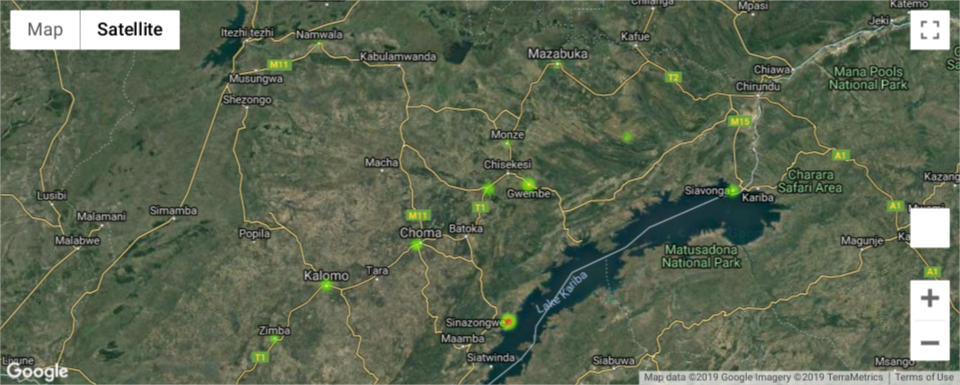

In [2]:
Image(filename='map.png')